In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse
# import warnings
# warnings.filterwarnings('ignore')
# from statsmodels.tools.sm_exceptions import ConvergenceWarning
# warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [20]:
X = np.abs(np.random.uniform(-1, 1, 100 * 2).reshape((100, 2)))
B = np.ones(2)
B_X = 20 + X @ B
data = pd.DataFrame(X)
x_cols = ['f' + str(i) for i in range(2)]
data.columns = x_cols
e = np.random.normal(0, 1, 100)
y = B_X + e

# data['f2'] = np.random.uniform(-1, 1, 3000)

g_split = np.repeat(range(5), [20,20,20,20,20])
data['gV'] = g_split
# u0 = np.repeat([12,-12.5,27,-11.1,25], [20,20,20,20,20])
# y = y + u0

# Random slopes
# u_slope = [-20,7,21,-5,-7] # how many split you want

u_slope = np.linspace(0,1,20)

X1 = X[0:20,:] # split the existing x into - (how many split you want) 
X2 = X[20:40,:]
X3 = X[40:60,:]
X4 = X[60:80,:]
X5 = X[80:,:]

X1 = X1 * u_slope
X2 = X2 * u_slope
X3 = X3 * u_slope
X4 = X4 * u_slope
X5 = X5 * u_slope

# X1 = X1 * u_slope[0] # multiply each split to corrospnding slope value
# X2 = X2 * u_slope[1]
# X3 = X3 * u_slope[2]
# X4 = X4 * u_slope[3]
# X5 = X5 * u_slope[4]

# Combine X1 and X2
u_X = np.concatenate((X1, X2,X3,X4,X5), axis=0) #combine all to make one entire array
u_X = u_X @ B # sum of all columns 

y = y + u_X # finlly adding it to y
data['y'] = y

# data['']
data
data.to_csv("data2.csv", index=False)

# re = run_all(data)
# plt.scatter(re[2], re[3])

ValueError: operands could not be broadcast together with shapes (20,2) (20,) 

In [330]:
def create_group_nest_v2(n, n_effective_groups, n_visible_groups, n_contineous_features):

    size = n
    nEg = n_effective_groups
    nVg = n_visible_groups
    
    def make_visible_split(N, m):
        base_split_size, remainder = divmod(N, m)
        splits = [base_split_size] * m  # Create splits with equal base sizes
        for i in range(remainder):
            splits[i] += 1 

        result_dict = {i: splits[i] for i in range(m)}
        return splits #result_dict
    
    def make_effective_split(arr, g):
        if g <= 0:
            raise ValueError("The value of 'g' must be greater than 0")

        combined_splits = [0] * g  # Initialize the combined_splits list with g zeros
        groups = [[] for _ in range(g)]  # Create g empty groups

        for i, num in enumerate(arr):
            group_index = i % g  # Determine the group index using modulus
            groups[group_index].append(num)  # Assign the element to the corresponding group

        for i in range(g):
            combined_splits[i] = sum(groups[i])  # Calculate the sum for each group
        
        groups = [item for sublist in groups for item in sublist]
        return combined_splits, groups

    cat_length = size # assign initial size to a category
    
    # generating fixed part simply y = mx + c
    X = np.random.uniform(-1, 1, size * n_contineous_features).reshape((size, n_contineous_features))
#     betas = np.ones(n_contineous_features)
    betas = np.random.randint(10, size = n_contineous_features)
    Xbeta = 55 + X @ betas # initial intercept 0
    fX = Xbeta
    data = pd.DataFrame(X)
    x_cols = ['f' + str(i) for i in range(n_contineous_features)]
    data.columns = x_cols
    e = np.random.normal(0, 1, size)
    y = fX + e
    
    ########### Create effective and visible splits ############
    
    v_splits = make_visible_split(size, nVg)
    e_splits, v_splits = make_effective_split(v_splits, nEg)
    
    data['gE'] = np.repeat(range(nEg), e_splits)

    random_intercept = np.random.randint(200, size = len(e_splits))
#     random_intercept = np.random.normal(0,1,size = len(e_splits))
    ue = np.repeat(random_intercept, e_splits)
    y = y + ue
    
    X_split = np.split(X, np.cumsum(e_splits)[:-1])
    slopes = np.random.uniform(-100, 50, size = len(e_splits))
    for i in range(len(X_split)):
        X_split[i] = X_split[i] * slopes[i]
    u1_X = np.concatenate(X_split, axis=0)
    u1_X = np.sum(u1_X, axis=1)
    y = y + u1_X
    
#     data['uE'] = ue
#     data['t'] = np.repeat(slopes, e_splits)
    
    ########### Visible Group split ############
    
    data['gV'] = np.repeat(range(nVg), v_splits)

    data['y'] = y
    return data, e_splits, v_splits

In [334]:
np.random.seed(104)
data,a,b = create_group_nest_v2(1000000,10000,100000,4)
data.drop('gE', axis=1, inplace=True)
# plot_MEM(data, "gV")
# re = run_all(data)

In [335]:
data.to_csv("forR.csv",index=False)

(945.75269515106, <matplotlib.collections.PathCollection at 0x224645cd630>)

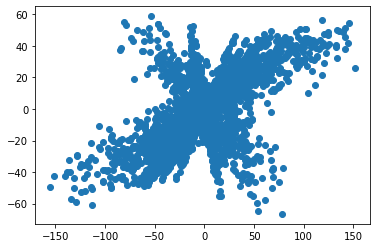

In [313]:
re[0], plt.scatter(re[2], re[3])

In [336]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

X,y = data.drop('y', axis=1), data.y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

# XGBoost Regression
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)
xgb_predictions = xgb_regressor.predict(X_test)

# # Support Vector Machine (SVM) Regression
# svm_regressor = SVR(kernel='linear')
# svm_regressor.fit(X_train, y_train)
# svm_predictions = svm_regressor.predict(X_test)

# # Decision Tree Regression
# dt_regressor = DecisionTreeRegressor(random_state=42)
# dt_regressor.fit(X_train, y_train)
# dt_predictions = dt_regressor.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
# svm_mse = mean_squared_error(y_test, svm_predictions)
# dt_mse = mean_squared_error(y_test, dt_predictions)

print("Random Forest MSE:", rf_mse)
print("XGBoost MSE:", xgb_mse)
# print("SVM MSE:", svm_mse)
# print("Decision Tree MSE:", dt_mse)

Random Forest MSE: 6106.421166671439
XGBoost MSE: 5163.936329579149


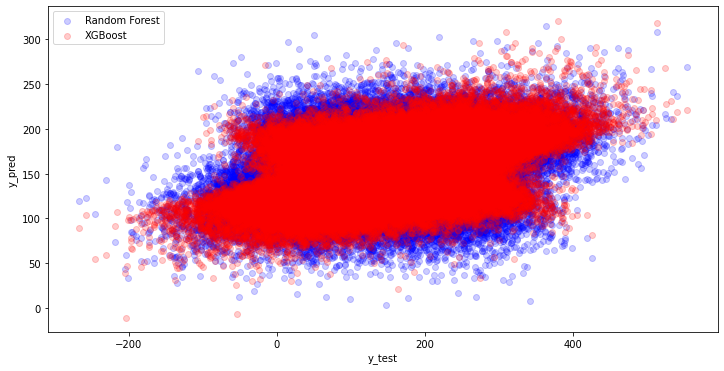

In [337]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest', alpha= 0.2)
plt.scatter(y_test, xgb_predictions, color='red', label='XGBoost', alpha = 0.2)
# plt.scatter(y_test, svm_predictions, color='red', label='SVM')
# plt.scatter(y_test, dt_predictions, color='orange', label='Decision Tree')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()

In [310]:
xgb_regressor.feature_importances_

array([0.00134333, 0.00259659, 0.9960601 ], dtype=float32)

In [215]:
X,y = X_test, rf_predictions

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)

intercept = dt_regressor.tree_
coefficients = dt_regressor.coef_

print(f"Intercept: {intercept}")
print(f"\nCoefficients: {coefficients}")
print(f"\nMSE: {mse(y_test, y_pred)}")

AttributeError: 'DecisionTreeRegressor' object has no attribute 'intercept_'

In [66]:
# df,coeff, ue, uv = create_group_nest_v2(10, 2,3,2)
# from sklearn.preprocessing import OneHotEncoder

df = data.copy()

column_to_encode = ['gV']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[column_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(column_to_encode)).astype(int)
final_df = pd.concat([df, encoded_df], axis=1)
final_df.drop(column_to_encode, axis=1, inplace=True)


# final_df.drop(['gE'], axis=1, inplace=True)
# g_cols = [col for col in final_df.columns if col.startswith('g') and col not in column_to_encode]
# final_df['g_cart'] = final_df[g_cols].apply(lambda row: '_'.join(row.astype(str)), axis=1)
# final_df["g_cart"] = pd.factorize(final_df['g_cart'])[0]
# final_df.drop(g_cols, axis=1, inplace=True)
final_df
# run_all(final_df)

C:\Users\htals\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,f0,f1,y,gV_0,gV_1,gV_2,gV_3,gV_4
0,0.410983,0.192091,-41.114058,1,0,0,0,0
1,-0.195152,-0.019551,25.743598,1,0,0,0,0
2,0.113575,-0.483217,35.807351,1,0,0,0,0
3,-0.166985,0.683223,-33.422890,1,0,0,0,0
4,-0.268335,0.294336,5.789274,1,0,0,0,0
...,...,...,...,...,...,...,...,...
995,-0.270152,0.081861,10.355607,0,0,0,0,1
996,0.938939,0.440777,-39.406327,0,0,0,0,1
997,0.462676,0.933582,-39.790964,0,0,0,0,1
998,-0.644354,-0.040279,26.124658,0,0,0,0,1


In [67]:
final_df['inter_f0_0'] = final_df['f0'] * final_df.gV_0
final_df['inter_f0_1'] = final_df['f0'] * final_df.gV_1
final_df['inter_f0_2'] = final_df['f0'] * final_df.gV_2
final_df['inter_f0_3'] = final_df['f0'] * final_df.gV_3
final_df['inter_f0_4'] = final_df['f0'] * final_df.gV_4


final_df['inter_f1_0'] = final_df['f1'] * final_df.gV_0
final_df['inter_f1_1'] = final_df['f1'] * final_df.gV_1
final_df['inter_f1_2'] = final_df['f1'] * final_df.gV_2
final_df['inter_f1_3'] = final_df['f1'] * final_df.gV_3
final_df['inter_f1_4'] = final_df['f1'] * final_df.gV_4

# final_df['inter_3'] = final_df['f2'] * final_df.gV_0
# final_df['inter_6'] = final_df['f2'] * final_df.gV_0
# final_df['inter_9'] = final_df['f2'] * final_df.gV_0

final_df.drop(['gV_0','gV_1','gV_2','gV_3','gV_4'], axis=1, inplace=True)
final_df

,f0,f1,y,inter_f0_0,inter_f0_1,inter_f0_2,inter_f0_3,inter_f0_4,inter_f1_0,inter_f1_1,inter_f1_2,inter_f1_3,inter_f1_4
0,0.410983,0.192091,-41.114058,0.410983,0.0,0.0,0.0,0.000000,0.192091,0.0,0.0,0.0,0.000000
1,-0.195152,-0.019551,25.743598,-0.195152,-0.0,-0.0,-0.0,-0.000000,-0.019551,-0.0,-0.0,-0.0,-0.000000
2,0.113575,-0.483217,35.807351,0.113575,0.0,0.0,0.0,0.000000,-0.483217,-0.0,-0.0,-0.0,-0.000000
3,-0.166985,0.683223,-33.422890,-0.166985,-0.0,-0.0,-0.0,-0.000000,0.683223,0.0,0.0,0.0,0.000000
4,-0.268335,0.294336,5.789274,-0.268335,-0.0,-0.0,-0.0,-0.000000,0.294336,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.270152,0.081861,10.355607,-0.000000,-0.0,-0.0,-0.0,-0.270152,0.000000,0.0,0.0,0.0,0.081861
996,0.938939,0.440777,-39.406327,0.000000,0.0,0.0,0.0,0.938939,0.000000,0.0,0.0,0.0,0.440777
997,0.462676,0.933582,-39.790964,0.000000,0.0,0.0,0.0,0.462676,0.000000,0.0,0.0,0.0,0.933582
998,-0.644354,-0.040279,26.124658,-0.000000,-0.0,-0.0,-0.0,-0.644354,-0.000000,-0.0,-0.0,-0.0,-0.040279


MSE:  0.9771844346100945


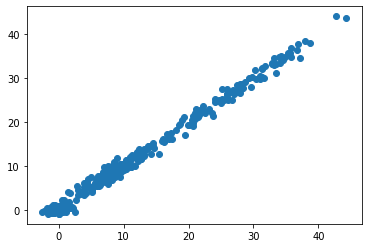

In [203]:
# re = run_all(final_df)
print("MSE: ", re[0])
plt.scatter(re[2], re[3])
plt.show()

In [74]:

from sklearn.preprocessing import OneHotEncoder

column_to_encode = ['gV']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[column_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(column_to_encode)).astype(int)
final_df = pd.concat([df, encoded_df], axis=1)
# final_df.drop(['gE','gV'], axis=1, inplace=True)
final_df

C:\Users\htals\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,f0,f1,gV,y,gV_0,gV_1,gV_2,gV_3,gV_4,gV_5,...,gV_490,gV_491,gV_492,gV_493,gV_494,gV_495,gV_496,gV_497,gV_498,gV_499
0,0.547307,0.273585,0,4.305759,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.354236,0.219329,0,4.336256,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.353242,-0.830136,1,2.416992,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.759484,0.125957,1,2.566190,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.808554,0.468690,2,2.305814,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.211981,0.140440,497,3.643970,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0.087159,-0.051065,498,3.325507,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
997,0.764790,-0.257703,498,2.768801,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
998,-0.025587,0.377998,499,3.487644,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
def plot_MEM(df, G):
    fig_width = 10  # Width of the figure in inches
    fig_height = 7.8  # Height of the figure in inches
    fig_dpi = 100  # Dots per inch (resolution)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=fig_dpi)

    col = str(G)

    for i in np.unique(df[col]):
        sns.regplot(df[df[col] == i]['f0'], df[df[col] == i]['y'],scatter_kws={"alpha": 0.5})
        
    return plt.show()

In [51]:
df

,f0,f1,y,gV_0,gV_1,gV_2,gV_3,gV_4,gV_5,gV_6,...,gV_240,gV_241,gV_242,gV_243,gV_244,gV_245,gV_246,gV_247,gV_248,gV_249
0,0.086810,-0.443261,0.252038,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.150965,0.689552,1.006668,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.990562,-0.756862,-0.427588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.341498,0.651706,2.261067,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.726587,0.150187,-0.064700,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.261782,-0.042090,4.229242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,-0.718409,-0.341780,2.659889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.551233,0.266062,4.719096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,-0.789505,0.961796,3.783451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Intercept: 0.24974402745655094

Coefficients: [-2.82694458e+01 -2.61124865e+01 -1.50187946e-04]

MSE: 900.7294701655127


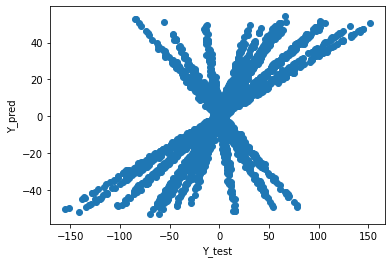

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# np.random.seed(100)
# df,coeff, ue, uv = create_group_nest_v2(1000, 2,500,2)
# df.drop('gE', axis=1, inplace=True)

# df = data.copy()

# column_to_encode = ['gV']
# encoder = OneHotEncoder(sparse=False)
# encoded_data = encoder.fit_transform(df[column_to_encode])
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(column_to_encode))
# final_df = pd.concat([df, encoded_df], axis=1)
# final_df.drop(['gV'], axis=1, inplace=True)
# df = final_df.copy()

# X,y = final_df.drop('y', axis=1), final_df.y
X,y = data.drop('y', axis=1), data.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
results = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print(f"\nCoefficients: {coefficients}")
print(f"\nMSE: {mse(y_test, y_pred)}")

import scipy.stats as stats

# stat, pvalue = stats.shapiro(y_pred-y_test)
# print("\n\nShapiro-Wilk test:")
# print("statistic:", stat)
# print("p-value:", pvalue)

# # Jarque-Bera test
# stat, pvalue = stats.jarque_bera(y_pred-y_test)
# print("Jarque-Bera test:")
# print("statistic:", stat)
# print("p-value:", pvalue)

plt.scatter(y_test, y_pred)
plt.ylabel('Y_pred')
plt.xlabel('Y_test')
plt.show()

In [80]:
data

,f0,f1,z0,y
0,0.886617,0.223981,0,561.238188
1,0.278096,0.225287,0,256.148114
2,0.402684,0.967860,0,693.395039
3,0.948289,0.012047,0,486.585782
4,0.844929,0.271008,0,564.574444
...,...,...,...,...
495,0.890182,0.901700,1,204.185717
496,0.235688,0.561202,1,89.314983
497,0.482551,0.353970,1,92.791554
498,0.268828,0.303769,1,64.277498


In [206]:
data_train

,f0,f1,z0,inter_f0_0,inter_f0_1,inter_f0_2,inter_f1_0,inter_f1_1,inter_f1_2,y
359,0.654578,0.219886,0,0.654578,0.000000,0.000000,0.219886,0.000000,0.000000,0.091166
422,0.094395,0.588520,1,0.000000,0.094395,0.000000,0.000000,0.588520,0.000000,4.845983
678,0.178028,0.257015,1,0.000000,0.178028,0.000000,0.000000,0.257015,0.000000,3.734964
526,0.386022,0.035770,1,0.000000,0.386022,0.000000,0.000000,0.035770,0.000000,4.576935
477,0.243257,0.322174,1,0.000000,0.243257,0.000000,0.000000,0.322174,0.000000,6.834036
...,...,...,...,...,...,...,...,...,...,...
1044,0.625368,0.235623,2,0.000000,0.000000,0.625368,0.000000,0.000000,0.235623,19.540996
1095,0.621490,0.587173,2,0.000000,0.000000,0.621490,0.000000,0.000000,0.587173,28.405884
1130,0.544548,0.422237,2,0.000000,0.000000,0.544548,0.000000,0.000000,0.422237,23.365299
860,0.939599,0.536456,2,0.000000,0.000000,0.939599,0.000000,0.000000,0.536456,33.104477


In [320]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

# X, y = final_df.drop('y', axis=1), final_df['y']
X, y = data.drop('y', axis=1), data['y']

# x_cols = [col for col in X.columns if col if not col.startswith('g')]
# g_cols = [col for col in X.columns if col if col.startswith('g')]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

data_train = pd.concat([X_train, y_train], axis=1)

# md = sm.OLS.from_formula("y ~ "+str('+'.join([i for i in X.columns])), data_train)

# md = sm.MixedLM.from_formula("y ~ "+str('+'.join([i for i in X.columns if i!='z0'])), data_train,
#                              groups = data_train['z0'])

md = sm.MixedLM.from_formula(f"y ~ f0*gV + f1*gV", data_train, groups = data_train['gV'])

# md = sm.MixedLM.from_formula(f"y ~ 1 + f0 + f1 + (1 | gV)", data_train, re_formula='~1+f0+f1', vc_formula={"f0": "0 + C(f0*gV)", "f1": "1 + C(f1*gV)"},
#                              groups = data_train['gV'])
mdf = md.fit()
print(mdf.summary())
print("MSE-train: ", mse(data_train.y, mdf.fittedvalues))
mlm_pred = mdf.predict(X_test)
print("MSE-test: ", mse(y_test, mlm_pred),"\n\n")
import scipy.stats as stats

stat, pvalue = stats.shapiro(mlm_pred-y_test)
print("Shapiro-Wilk test:")
print("statistic:", stat)
print("p-value:", pvalue)

# Jarque-Bera test
stat, pvalue = stats.jarque_bera(mlm_pred-y_test)
print("Jarque-Bera test:")
print("statistic:", stat)
print("p-value:", pvalue)

plt.scatter(y_test, mlm_pred)
plt.show()
print("MSE: ", mse(y_test, mlm_pred))

plt.scatter(data_train.y, mdf.fittedvalues)
plt.show()

PatsyError: Error evaluating factor: TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]
    y ~ f0*gV + f1*gV + (1|f0*gV)
                         ^^^^

<AxesSubplot:xlabel='f1', ylabel='y'>

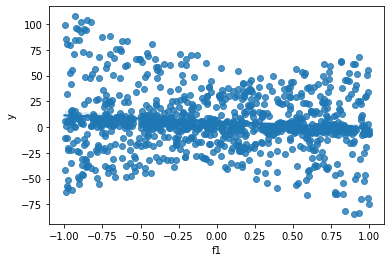

In [140]:
sns.regplot(data.f0, data.y)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (7,)

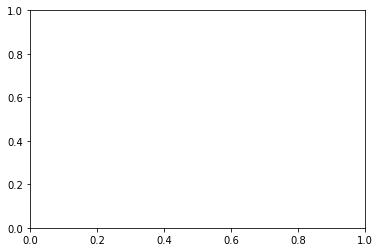

In [137]:
plt.plot(data.f0, fixed_effects, label="Fixed effects", color="blue", linewidth=2)

In [282]:
g_cols = [col for col in df.columns if col if col.startswith('g')]
g_cols

['gV_0', 'gV_1', 'gV_2', 'gV_3', 'gV_4']

In [287]:
df_original = df.copy()
run_all(g_cols)

         f0        f1          y  z0
0 -0.359650  0.016905  27.096990   0
1 -0.292163  0.511223  29.126722   0
2 -0.719203  0.547966  30.944321   0
3  0.157285  0.315156  29.083378   0
4  0.937579 -0.846388  22.550433   0
n_uniques:  [5]


(3.2880869440668787,
 3.374387741088867,
 1860    33.309119
 353     26.619434
 1333    38.745023
 905     34.119524
 1289    37.582243
           ...    
 118     29.947178
 1249    36.074375
 1993    31.477779
 522     24.577558
 513     25.342056
 Name: y, Length: 660, dtype: float64,
 array([32.93062015, 25.85076841, 37.30151952, 35.57412388, 36.73832906,
        39.04086888, 28.88992169, 41.23281856, 21.19828161, 34.2015878 ,
        25.87626966, 28.27850164, 26.36414006, 21.06237125, 21.05426725,
        24.34662374, 32.45628452, 27.80846533, 34.97972675, 31.45765872,
        32.95773029, 35.97129245, 39.31740947, 35.02413609, 33.04596706,
        20.33768019, 31.34380581, 25.69201901, 21.06066799, 23.89375814,
        27.23982334, 30.69933369, 34.38880634, 24.15945103, 36.38218357,
        33.2323389 , 32.87772556, 32.04808438, 28.28818371, 23.76174482,
        32.94072088, 31.4200687 , 22.2180551 , 21.98669719, 33.74718297,
        29.07214405, 22.78862667, 24.90855839, 30.7700

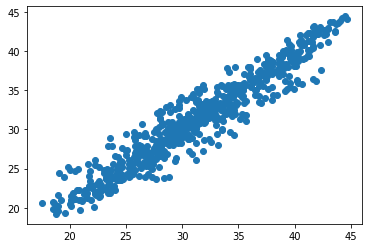

In [288]:
plt.scatter(y_test, y_pred)

In [290]:
df

,f0,f1,gV,y
0,0.086810,-0.443261,0,2.705058
1,-0.150965,0.689552,0,8.538272
2,-0.990562,-0.756862,0,-0.301773
3,0.341498,0.651706,0,9.503257
4,-0.726587,0.150187,0,6.717686
...,...,...,...,...
997,0.551233,0.266062,2,31.142903
998,-0.789505,0.961796,2,36.583710
999,-0.270404,0.557129,2,31.943141
1000,-0.481113,-0.953994,2,24.473085


In [294]:
g_cols = ['gV']
df['g_cart'] = df[g_cols].apply(lambda row: '_'.join(row.astype(str)), axis=1)
print(df)
df["g_cart"] = pd.factorize(df['g_cart'])[0]
print(df)
df.drop(g_cols, axis=1, inplace=True)
df

            f0        f1  gV          y g_cart
0     0.086810 -0.443261   0  18.273945      0
1    -0.150965  0.689552   0  21.379498      0
2    -0.990562 -0.756862   0  13.465373      0
3     0.341498  0.651706   0  21.004216      0
4    -0.726587  0.150187   0  16.247065      0
...        ...       ...  ..        ...    ...
1003 -0.993410 -0.755379   7   7.884636      7
1004  0.459785  0.487294   7  15.125981      7
1005 -0.624995  0.986345   7  12.618101      7
1006  0.908426  0.191587   7  14.735544      7
1007  0.816551  0.424893   7  17.240743      7

[1008 rows x 5 columns]
            f0        f1  gV          y  g_cart
0     0.086810 -0.443261   0  18.273945       0
1    -0.150965  0.689552   0  21.379498       0
2    -0.990562 -0.756862   0  13.465373       0
3     0.341498  0.651706   0  21.004216       0
4    -0.726587  0.150187   0  16.247065       0
...        ...       ...  ..        ...     ...
1003 -0.993410 -0.755379   7   7.884636       7
1004  0.459785  0.487294   

,f0,f1,y,g_cart
0,0.086810,-0.443261,18.273945,0
1,-0.150965,0.689552,21.379498,0
2,-0.990562,-0.756862,13.465373,0
3,0.341498,0.651706,21.004216,0
4,-0.726587,0.150187,16.247065,0
...,...,...,...,...
1003,-0.993410,-0.755379,7.884636,7
1004,0.459785,0.487294,15.125981,7
1005,-0.624995,0.986345,12.618101,7
1006,0.908426,0.191587,14.735544,7


In [209]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,z0,ue,uv,y
0,0.307179,-0.769986,0.900566,-0.035617,0.744949,-0.575335,-0.918581,-0.205611,-0.533736,0.683481,0,12,2,15.401498
1,-0.585835,0.484939,-0.215692,-0.635487,0.487079,-0.860836,0.770674,0.905289,0.862287,-0.169138,0,12,2,15.746435
2,-0.942037,0.964055,-0.320725,0.413374,-0.276246,-0.929788,0.710117,0.314507,0.531366,0.108174,0,12,2,14.728307
3,0.770186,0.808395,-0.979157,-0.850887,-0.510742,-0.733390,0.395850,-0.203590,0.766244,-0.637985,0,12,2,12.787186
4,-0.135002,-0.963714,0.382876,-0.060619,-0.743556,0.782674,0.836407,-0.853758,-0.909104,-0.122854,0,12,2,15.691330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.571027,-0.132202,0.686854,-0.952649,0.425952,0.300751,-0.453220,0.152367,0.275915,-0.911175,19,12,5,17.743703
996,-0.924568,-0.270021,-0.274763,0.133715,0.315857,0.141460,-0.741694,0.757099,-0.248747,0.780695,19,12,5,18.261854
997,0.036117,-0.015597,0.257515,-0.370371,-0.429447,0.488392,0.290938,-0.439966,-0.797172,0.677043,19,12,5,16.869238
998,-0.101507,0.624815,-0.441252,-0.947503,0.335618,0.778056,0.685994,-0.825338,-0.715836,-0.520115,19,12,5,17.761526


In [319]:
results = pd.DataFrame([])
eff = list(range(2,12))
visi = list(range(2,501))

counter = Count(0).gen()

for i in eff:
    
    for j in visi:
        
        if i<j:
        
            itr = next(counter)
            print(itr,i,j)
            np.random.seed(1000)
            df,coeff, ue, uv = create_group_nest_v2(1000, i,j,10)
            df = df.drop('gE', axis=1)

            mse_lmm, mse_lr, time_lmm, y_test, y_pred = run_all(df)

            results.at[itr, 'gE'] = i
            results.at[itr, 'gV'] = j
            results.at[itr, 'mse'] = mse_lmm


0 2 3
n_uniques:  [3]
1 2 4
n_uniques:  [4]
2 2 5
n_uniques:  [5]
3 2 6
n_uniques:  [6]
4 2 7
n_uniques:  [7]
5 2 8
n_uniques:  [8]
6 2 9
n_uniques:  [9]
7 2 10
n_uniques:  [10]
8 2 11
n_uniques:  [11]
9 2 12
n_uniques:  [12]
10 2 13
n_uniques:  [13]
11 2 14
n_uniques:  [14]
12 2 15
n_uniques:  [15]
13 2 16
n_uniques:  [16]
14 2 17
n_uniques:  [17]
15 2 18
n_uniques:  [18]
16 2 19
n_uniques:  [19]
17 2 20
n_uniques:  [20]
18 2 21
n_uniques:  [21]
19 2 22
n_uniques:  [22]
20 2 23
n_uniques:  [23]
21 2 24
n_uniques:  [24]
22 2 25
n_uniques:  [25]
23 2 26
n_uniques:  [26]
24 2 27
n_uniques:  [27]
25 2 28
n_uniques:  [28]
26 2 29
n_uniques:  [29]
27 2 30
n_uniques:  [30]
28 2 31
n_uniques:  [31]
29 2 32
n_uniques:  [32]
30 2 33
n_uniques:  [33]
31 2 34
n_uniques:  [34]
32 2 35
n_uniques:  [35]
33 2 36
n_uniques:  [36]
34 2 37
n_uniques:  [37]
35 2 38
n_uniques:  [38]
36 2 39
n_uniques:  [39]
37 2 40
n_uniques:  [40]
38 2 41
n_uniques:  [41]
39 2 42
n_uniques:  [42]
40 2 43
n_uniques:  [43]

304 2 307
n_uniques:  [307]
305 2 308
n_uniques:  [308]
306 2 309
n_uniques:  [309]
307 2 310
n_uniques:  [310]
308 2 311
n_uniques:  [311]
309 2 312
n_uniques:  [312]
310 2 313
n_uniques:  [313]
311 2 314
n_uniques:  [314]
312 2 315
n_uniques:  [315]
313 2 316
n_uniques:  [316]
314 2 317
n_uniques:  [317]
315 2 318
n_uniques:  [318]
316 2 319
n_uniques:  [319]
317 2 320
n_uniques:  [320]
318 2 321
n_uniques:  [321]
319 2 322
n_uniques:  [322]
320 2 323
n_uniques:  [323]
321 2 324
n_uniques:  [324]
322 2 325
n_uniques:  [325]
323 2 326
n_uniques:  [326]
324 2 327
n_uniques:  [327]
325 2 328
n_uniques:  [328]
326 2 329
n_uniques:  [329]
327 2 330
n_uniques:  [330]
328 2 331
n_uniques:  [331]
329 2 332
n_uniques:  [332]
330 2 333
n_uniques:  [333]
331 2 334
n_uniques:  [334]
332 2 335
n_uniques:  [335]
333 2 336
n_uniques:  [336]
334 2 337
n_uniques:  [337]
335 2 338
n_uniques:  [338]
336 2 339
n_uniques:  [339]
337 2 340
n_uniques:  [340]
338 2 341
n_uniques:  [341]
339 2 342
n_uniques:

604 3 110
n_uniques:  [110]
605 3 111
n_uniques:  [111]
606 3 112
n_uniques:  [112]
607 3 113
n_uniques:  [113]
608 3 114
n_uniques:  [114]
609 3 115
n_uniques:  [115]
610 3 116
n_uniques:  [116]
611 3 117
n_uniques:  [117]
612 3 118
n_uniques:  [118]
613 3 119
n_uniques:  [119]
614 3 120
n_uniques:  [120]
615 3 121
n_uniques:  [121]
616 3 122
n_uniques:  [122]
617 3 123
n_uniques:  [123]
618 3 124
n_uniques:  [124]
619 3 125
n_uniques:  [125]
620 3 126
n_uniques:  [126]
621 3 127
n_uniques:  [127]
622 3 128
n_uniques:  [128]
623 3 129
n_uniques:  [129]
624 3 130
n_uniques:  [130]
625 3 131
n_uniques:  [131]
626 3 132
n_uniques:  [132]
627 3 133
n_uniques:  [133]
628 3 134
n_uniques:  [134]
629 3 135
n_uniques:  [135]
630 3 136
n_uniques:  [136]
631 3 137
n_uniques:  [137]
632 3 138
n_uniques:  [138]
633 3 139
n_uniques:  [139]
634 3 140
n_uniques:  [140]
635 3 141
n_uniques:  [141]
636 3 142
n_uniques:  [142]
637 3 143
n_uniques:  [143]
638 3 144
n_uniques:  [144]
639 3 145
n_uniques:

897 3 403
n_uniques:  [403]
898 3 404
n_uniques:  [404]
899 3 405
n_uniques:  [405]
900 3 406
n_uniques:  [406]
901 3 407
n_uniques:  [407]
902 3 408
n_uniques:  [408]
903 3 409
n_uniques:  [409]
904 3 410
n_uniques:  [410]
905 3 411
n_uniques:  [411]
906 3 412
n_uniques:  [412]
907 3 413
n_uniques:  [413]
908 3 414
n_uniques:  [414]
909 3 415
n_uniques:  [415]
910 3 416
n_uniques:  [416]
911 3 417
n_uniques:  [417]
912 3 418
n_uniques:  [418]
913 3 419
n_uniques:  [419]
914 3 420
n_uniques:  [420]
915 3 421
n_uniques:  [421]
916 3 422
n_uniques:  [422]
917 3 423
n_uniques:  [423]
918 3 424
n_uniques:  [424]
919 3 425
n_uniques:  [425]
920 3 426
n_uniques:  [426]
921 3 427
n_uniques:  [427]
922 3 428
n_uniques:  [428]
923 3 429
n_uniques:  [429]
924 3 430
n_uniques:  [430]
925 3 431
n_uniques:  [431]
926 3 432
n_uniques:  [432]
927 3 433
n_uniques:  [433]
928 3 434
n_uniques:  [434]
929 3 435
n_uniques:  [435]
930 3 436
n_uniques:  [436]
931 3 437
n_uniques:  [437]
932 3 438
n_uniques:

1190 4 200
n_uniques:  [200]
1191 4 201
n_uniques:  [201]
1192 4 202
n_uniques:  [202]
1193 4 203
n_uniques:  [203]
1194 4 204
n_uniques:  [204]
1195 4 205
n_uniques:  [205]
1196 4 206
n_uniques:  [206]
1197 4 207
n_uniques:  [207]
1198 4 208
n_uniques:  [208]
1199 4 209
n_uniques:  [209]
1200 4 210
n_uniques:  [210]
1201 4 211
n_uniques:  [211]
1202 4 212
n_uniques:  [212]
1203 4 213
n_uniques:  [213]
1204 4 214
n_uniques:  [214]
1205 4 215
n_uniques:  [215]
1206 4 216
n_uniques:  [216]
1207 4 217
n_uniques:  [217]
1208 4 218
n_uniques:  [218]
1209 4 219
n_uniques:  [219]
1210 4 220
n_uniques:  [220]
1211 4 221
n_uniques:  [221]
1212 4 222
n_uniques:  [222]
1213 4 223
n_uniques:  [223]
1214 4 224
n_uniques:  [224]
1215 4 225
n_uniques:  [225]
1216 4 226
n_uniques:  [226]
1217 4 227
n_uniques:  [227]
1218 4 228
n_uniques:  [228]
1219 4 229
n_uniques:  [229]
1220 4 230
n_uniques:  [230]
1221 4 231
n_uniques:  [231]
1222 4 232
n_uniques:  [232]
1223 4 233
n_uniques:  [233]
1224 4 234
n_u

1473 4 483
n_uniques:  [483]
1474 4 484
n_uniques:  [484]
1475 4 485
n_uniques:  [485]
1476 4 486
n_uniques:  [486]
1477 4 487
n_uniques:  [487]
1478 4 488
n_uniques:  [488]
1479 4 489
n_uniques:  [489]
1480 4 490
n_uniques:  [490]
1481 4 491
n_uniques:  [491]
1482 4 492
n_uniques:  [492]
1483 4 493
n_uniques:  [493]
1484 4 494
n_uniques:  [494]
1485 4 495
n_uniques:  [495]
1486 4 496
n_uniques:  [496]
1487 4 497
n_uniques:  [497]
1488 4 498
n_uniques:  [498]
1489 4 499
n_uniques:  [499]
1490 4 500
n_uniques:  [500]
1491 5 6
n_uniques:  [6]
1492 5 7
n_uniques:  [7]
1493 5 8
n_uniques:  [8]
1494 5 9
n_uniques:  [9]
1495 5 10
n_uniques:  [10]
1496 5 11
n_uniques:  [11]
1497 5 12
n_uniques:  [12]
1498 5 13
n_uniques:  [13]
1499 5 14
n_uniques:  [14]
1500 5 15
n_uniques:  [15]
1501 5 16
n_uniques:  [16]
1502 5 17
n_uniques:  [17]
1503 5 18
n_uniques:  [18]
1504 5 19
n_uniques:  [19]
1505 5 20
n_uniques:  [20]
1506 5 21
n_uniques:  [21]
1507 5 22
n_uniques:  [22]
1508 5 23
n_uniques:  [23]


1763 5 278
n_uniques:  [278]
1764 5 279
n_uniques:  [279]
1765 5 280
n_uniques:  [280]
1766 5 281
n_uniques:  [281]
1767 5 282
n_uniques:  [282]
1768 5 283
n_uniques:  [283]
1769 5 284
n_uniques:  [284]
1770 5 285
n_uniques:  [285]
1771 5 286
n_uniques:  [286]
1772 5 287
n_uniques:  [287]
1773 5 288
n_uniques:  [288]
1774 5 289
n_uniques:  [289]
1775 5 290
n_uniques:  [290]
1776 5 291
n_uniques:  [291]
1777 5 292
n_uniques:  [292]
1778 5 293
n_uniques:  [293]
1779 5 294
n_uniques:  [294]
1780 5 295
n_uniques:  [295]
1781 5 296
n_uniques:  [296]
1782 5 297
n_uniques:  [297]
1783 5 298
n_uniques:  [298]
1784 5 299
n_uniques:  [299]
1785 5 300
n_uniques:  [300]
1786 5 301
n_uniques:  [301]
1787 5 302
n_uniques:  [302]
1788 5 303
n_uniques:  [303]
1789 5 304
n_uniques:  [304]
1790 5 305
n_uniques:  [305]
1791 5 306
n_uniques:  [306]
1792 5 307
n_uniques:  [307]
1793 5 308
n_uniques:  [308]
1794 5 309
n_uniques:  [309]
1795 5 310
n_uniques:  [310]
1796 5 311
n_uniques:  [311]
1797 5 312
n_u

2051 6 72
n_uniques:  [72]
2052 6 73
n_uniques:  [73]
2053 6 74
n_uniques:  [74]
2054 6 75
n_uniques:  [75]
2055 6 76
n_uniques:  [76]
2056 6 77
n_uniques:  [77]
2057 6 78
n_uniques:  [78]
2058 6 79
n_uniques:  [79]
2059 6 80
n_uniques:  [80]
2060 6 81
n_uniques:  [81]
2061 6 82
n_uniques:  [82]
2062 6 83
n_uniques:  [83]
2063 6 84
n_uniques:  [84]
2064 6 85
n_uniques:  [85]
2065 6 86
n_uniques:  [86]
2066 6 87
n_uniques:  [87]
2067 6 88
n_uniques:  [88]
2068 6 89
n_uniques:  [89]
2069 6 90
n_uniques:  [90]
2070 6 91
n_uniques:  [91]
2071 6 92
n_uniques:  [92]
2072 6 93
n_uniques:  [93]
2073 6 94
n_uniques:  [94]
2074 6 95
n_uniques:  [95]
2075 6 96
n_uniques:  [96]
2076 6 97
n_uniques:  [97]
2077 6 98
n_uniques:  [98]
2078 6 99
n_uniques:  [99]
2079 6 100
n_uniques:  [100]
2080 6 101
n_uniques:  [101]
2081 6 102
n_uniques:  [102]
2082 6 103
n_uniques:  [103]
2083 6 104
n_uniques:  [104]
2084 6 105
n_uniques:  [105]
2085 6 106
n_uniques:  [106]
2086 6 107
n_uniques:  [107]
2087 6 108
n

2336 6 357
n_uniques:  [357]
2337 6 358
n_uniques:  [358]
2338 6 359
n_uniques:  [359]
2339 6 360
n_uniques:  [360]
2340 6 361
n_uniques:  [361]
2341 6 362
n_uniques:  [362]
2342 6 363
n_uniques:  [363]
2343 6 364
n_uniques:  [364]
2344 6 365
n_uniques:  [365]
2345 6 366
n_uniques:  [366]
2346 6 367
n_uniques:  [367]
2347 6 368
n_uniques:  [368]
2348 6 369
n_uniques:  [369]
2349 6 370
n_uniques:  [370]
2350 6 371
n_uniques:  [371]
2351 6 372
n_uniques:  [372]
2352 6 373
n_uniques:  [373]
2353 6 374
n_uniques:  [374]
2354 6 375
n_uniques:  [375]
2355 6 376
n_uniques:  [376]
2356 6 377
n_uniques:  [377]
2357 6 378
n_uniques:  [378]
2358 6 379
n_uniques:  [379]
2359 6 380
n_uniques:  [380]
2360 6 381
n_uniques:  [381]
2361 6 382
n_uniques:  [382]
2362 6 383
n_uniques:  [383]
2363 6 384
n_uniques:  [384]
2364 6 385
n_uniques:  [385]
2365 6 386
n_uniques:  [386]
2366 6 387
n_uniques:  [387]
2367 6 388
n_uniques:  [388]
2368 6 389
n_uniques:  [389]
2369 6 390
n_uniques:  [390]
2370 6 391
n_u

2625 7 153
n_uniques:  [153]
2626 7 154
n_uniques:  [154]
2627 7 155
n_uniques:  [155]
2628 7 156
n_uniques:  [156]
2629 7 157
n_uniques:  [157]
2630 7 158
n_uniques:  [158]
2631 7 159
n_uniques:  [159]
2632 7 160
n_uniques:  [160]
2633 7 161
n_uniques:  [161]
2634 7 162
n_uniques:  [162]
2635 7 163
n_uniques:  [163]
2636 7 164
n_uniques:  [164]
2637 7 165
n_uniques:  [165]
2638 7 166
n_uniques:  [166]
2639 7 167
n_uniques:  [167]
2640 7 168
n_uniques:  [168]
2641 7 169
n_uniques:  [169]
2642 7 170
n_uniques:  [170]
2643 7 171
n_uniques:  [171]
2644 7 172
n_uniques:  [172]
2645 7 173
n_uniques:  [173]
2646 7 174
n_uniques:  [174]
2647 7 175
n_uniques:  [175]
2648 7 176
n_uniques:  [176]
2649 7 177
n_uniques:  [177]
2650 7 178
n_uniques:  [178]
2651 7 179
n_uniques:  [179]
2652 7 180
n_uniques:  [180]
2653 7 181
n_uniques:  [181]
2654 7 182
n_uniques:  [182]
2655 7 183
n_uniques:  [183]
2656 7 184
n_uniques:  [184]
2657 7 185
n_uniques:  [185]
2658 7 186
n_uniques:  [186]
2659 7 187
n_u

2908 7 436
n_uniques:  [436]
2909 7 437
n_uniques:  [437]
2910 7 438
n_uniques:  [438]
2911 7 439
n_uniques:  [439]
2912 7 440
n_uniques:  [440]
2913 7 441
n_uniques:  [441]
2914 7 442
n_uniques:  [442]
2915 7 443
n_uniques:  [443]
2916 7 444
n_uniques:  [444]
2917 7 445
n_uniques:  [445]
2918 7 446
n_uniques:  [446]
2919 7 447
n_uniques:  [447]
2920 7 448
n_uniques:  [448]
2921 7 449
n_uniques:  [449]
2922 7 450
n_uniques:  [450]
2923 7 451
n_uniques:  [451]
2924 7 452
n_uniques:  [452]
2925 7 453
n_uniques:  [453]
2926 7 454
n_uniques:  [454]
2927 7 455
n_uniques:  [455]
2928 7 456
n_uniques:  [456]
2929 7 457
n_uniques:  [457]
2930 7 458
n_uniques:  [458]
2931 7 459
n_uniques:  [459]
2932 7 460
n_uniques:  [460]
2933 7 461
n_uniques:  [461]
2934 7 462
n_uniques:  [462]
2935 7 463
n_uniques:  [463]
2936 7 464
n_uniques:  [464]
2937 7 465
n_uniques:  [465]
2938 7 466
n_uniques:  [466]
2939 7 467
n_uniques:  [467]
2940 7 468
n_uniques:  [468]
2941 7 469
n_uniques:  [469]
2942 7 470
n_u

3197 8 233
n_uniques:  [233]
3198 8 234
n_uniques:  [234]
3199 8 235
n_uniques:  [235]
3200 8 236
n_uniques:  [236]
3201 8 237
n_uniques:  [237]
3202 8 238
n_uniques:  [238]
3203 8 239
n_uniques:  [239]
3204 8 240
n_uniques:  [240]
3205 8 241
n_uniques:  [241]
3206 8 242
n_uniques:  [242]
3207 8 243
n_uniques:  [243]
3208 8 244
n_uniques:  [244]
3209 8 245
n_uniques:  [245]
3210 8 246
n_uniques:  [246]
3211 8 247
n_uniques:  [247]
3212 8 248
n_uniques:  [248]
3213 8 249
n_uniques:  [249]
3214 8 250
n_uniques:  [250]
3215 8 251
n_uniques:  [251]
3216 8 252
n_uniques:  [252]
3217 8 253
n_uniques:  [253]
3218 8 254
n_uniques:  [254]
3219 8 255
n_uniques:  [255]
3220 8 256
n_uniques:  [256]
3221 8 257
n_uniques:  [257]
3222 8 258
n_uniques:  [258]
3223 8 259
n_uniques:  [259]
3224 8 260
n_uniques:  [260]
3225 8 261
n_uniques:  [261]
3226 8 262
n_uniques:  [262]
3227 8 263
n_uniques:  [263]
3228 8 264
n_uniques:  [264]
3229 8 265
n_uniques:  [265]
3230 8 266
n_uniques:  [266]
3231 8 267
n_u

3481 9 26
n_uniques:  [26]
3482 9 27
n_uniques:  [27]
3483 9 28
n_uniques:  [28]
3484 9 29
n_uniques:  [29]
3485 9 30
n_uniques:  [30]
3486 9 31
n_uniques:  [31]
3487 9 32
n_uniques:  [32]
3488 9 33
n_uniques:  [33]
3489 9 34
n_uniques:  [34]
3490 9 35
n_uniques:  [35]
3491 9 36
n_uniques:  [36]
3492 9 37
n_uniques:  [37]
3493 9 38
n_uniques:  [38]
3494 9 39
n_uniques:  [39]
3495 9 40
n_uniques:  [40]
3496 9 41
n_uniques:  [41]
3497 9 42
n_uniques:  [42]
3498 9 43
n_uniques:  [43]
3499 9 44
n_uniques:  [44]
3500 9 45
n_uniques:  [45]
3501 9 46
n_uniques:  [46]
3502 9 47
n_uniques:  [47]
3503 9 48
n_uniques:  [48]
3504 9 49
n_uniques:  [49]
3505 9 50
n_uniques:  [50]
3506 9 51
n_uniques:  [51]
3507 9 52
n_uniques:  [52]
3508 9 53
n_uniques:  [53]
3509 9 54
n_uniques:  [54]
3510 9 55
n_uniques:  [55]
3511 9 56
n_uniques:  [56]
3512 9 57
n_uniques:  [57]
3513 9 58
n_uniques:  [58]
3514 9 59
n_uniques:  [59]
3515 9 60
n_uniques:  [60]
3516 9 61
n_uniques:  [61]
3517 9 62
n_uniques:  [62]
3

3769 9 314
n_uniques:  [314]
3770 9 315
n_uniques:  [315]
3771 9 316
n_uniques:  [316]
3772 9 317
n_uniques:  [317]
3773 9 318
n_uniques:  [318]
3774 9 319
n_uniques:  [319]
3775 9 320
n_uniques:  [320]
3776 9 321
n_uniques:  [321]
3777 9 322
n_uniques:  [322]
3778 9 323
n_uniques:  [323]
3779 9 324
n_uniques:  [324]
3780 9 325
n_uniques:  [325]
3781 9 326
n_uniques:  [326]
3782 9 327
n_uniques:  [327]
3783 9 328
n_uniques:  [328]
3784 9 329
n_uniques:  [329]
3785 9 330
n_uniques:  [330]
3786 9 331
n_uniques:  [331]
3787 9 332
n_uniques:  [332]
3788 9 333
n_uniques:  [333]
3789 9 334
n_uniques:  [334]
3790 9 335
n_uniques:  [335]
3791 9 336
n_uniques:  [336]
3792 9 337
n_uniques:  [337]
3793 9 338
n_uniques:  [338]
3794 9 339
n_uniques:  [339]
3795 9 340
n_uniques:  [340]
3796 9 341
n_uniques:  [341]
3797 9 342
n_uniques:  [342]
3798 9 343
n_uniques:  [343]
3799 9 344
n_uniques:  [344]
3800 9 345
n_uniques:  [345]
3801 9 346
n_uniques:  [346]
3802 9 347
n_uniques:  [347]
3803 9 348
n_u

4055 10 110
n_uniques:  [110]
4056 10 111
n_uniques:  [111]
4057 10 112
n_uniques:  [112]
4058 10 113
n_uniques:  [113]
4059 10 114
n_uniques:  [114]
4060 10 115
n_uniques:  [115]
4061 10 116
n_uniques:  [116]
4062 10 117
n_uniques:  [117]
4063 10 118
n_uniques:  [118]
4064 10 119
n_uniques:  [119]
4065 10 120
n_uniques:  [120]
4066 10 121
n_uniques:  [121]
4067 10 122
n_uniques:  [122]
4068 10 123
n_uniques:  [123]
4069 10 124
n_uniques:  [124]
4070 10 125
n_uniques:  [125]
4071 10 126
n_uniques:  [126]
4072 10 127
n_uniques:  [127]
4073 10 128
n_uniques:  [128]
4074 10 129
n_uniques:  [129]
4075 10 130
n_uniques:  [130]
4076 10 131
n_uniques:  [131]
4077 10 132
n_uniques:  [132]
4078 10 133
n_uniques:  [133]
4079 10 134
n_uniques:  [134]
4080 10 135
n_uniques:  [135]
4081 10 136
n_uniques:  [136]
4082 10 137
n_uniques:  [137]
4083 10 138
n_uniques:  [138]
4084 10 139
n_uniques:  [139]
4085 10 140
n_uniques:  [140]
4086 10 141
n_uniques:  [141]
4087 10 142
n_uniques:  [142]
4088 10 14

4329 10 384
n_uniques:  [384]
4330 10 385
n_uniques:  [385]
4331 10 386
n_uniques:  [386]
4332 10 387
n_uniques:  [387]
4333 10 388
n_uniques:  [388]
4334 10 389
n_uniques:  [389]
4335 10 390
n_uniques:  [390]
4336 10 391
n_uniques:  [391]
4337 10 392
n_uniques:  [392]
4338 10 393
n_uniques:  [393]
4339 10 394
n_uniques:  [394]
4340 10 395
n_uniques:  [395]
4341 10 396
n_uniques:  [396]
4342 10 397
n_uniques:  [397]
4343 10 398
n_uniques:  [398]
4344 10 399
n_uniques:  [399]
4345 10 400
n_uniques:  [400]
4346 10 401
n_uniques:  [401]
4347 10 402
n_uniques:  [402]
4348 10 403
n_uniques:  [403]
4349 10 404
n_uniques:  [404]
4350 10 405
n_uniques:  [405]
4351 10 406
n_uniques:  [406]
4352 10 407
n_uniques:  [407]
4353 10 408
n_uniques:  [408]
4354 10 409
n_uniques:  [409]
4355 10 410
n_uniques:  [410]
4356 10 411
n_uniques:  [411]
4357 10 412
n_uniques:  [412]
4358 10 413
n_uniques:  [413]
4359 10 414
n_uniques:  [414]
4360 10 415
n_uniques:  [415]
4361 10 416
n_uniques:  [416]
4362 10 41

4608 11 174
n_uniques:  [174]
4609 11 175
n_uniques:  [175]
4610 11 176
n_uniques:  [176]
4611 11 177
n_uniques:  [177]
4612 11 178
n_uniques:  [178]
4613 11 179
n_uniques:  [179]
4614 11 180
n_uniques:  [180]
4615 11 181
n_uniques:  [181]
4616 11 182
n_uniques:  [182]
4617 11 183
n_uniques:  [183]
4618 11 184
n_uniques:  [184]
4619 11 185
n_uniques:  [185]
4620 11 186
n_uniques:  [186]
4621 11 187
n_uniques:  [187]
4622 11 188
n_uniques:  [188]
4623 11 189
n_uniques:  [189]
4624 11 190
n_uniques:  [190]
4625 11 191
n_uniques:  [191]
4626 11 192
n_uniques:  [192]
4627 11 193
n_uniques:  [193]
4628 11 194
n_uniques:  [194]
4629 11 195
n_uniques:  [195]
4630 11 196
n_uniques:  [196]
4631 11 197
n_uniques:  [197]
4632 11 198
n_uniques:  [198]
4633 11 199
n_uniques:  [199]
4634 11 200
n_uniques:  [200]
4635 11 201
n_uniques:  [201]
4636 11 202
n_uniques:  [202]
4637 11 203
n_uniques:  [203]
4638 11 204
n_uniques:  [204]
4639 11 205
n_uniques:  [205]
4640 11 206
n_uniques:  [206]
4641 11 20

4882 11 448
n_uniques:  [448]
4883 11 449
n_uniques:  [449]
4884 11 450
n_uniques:  [450]
4885 11 451
n_uniques:  [451]
4886 11 452
n_uniques:  [452]
4887 11 453
n_uniques:  [453]
4888 11 454
n_uniques:  [454]
4889 11 455
n_uniques:  [455]
4890 11 456
n_uniques:  [456]
4891 11 457
n_uniques:  [457]
4892 11 458
n_uniques:  [458]
4893 11 459
n_uniques:  [459]
4894 11 460
n_uniques:  [460]
4895 11 461
n_uniques:  [461]
4896 11 462
n_uniques:  [462]
4897 11 463
n_uniques:  [463]
4898 11 464
n_uniques:  [464]
4899 11 465
n_uniques:  [465]
4900 11 466
n_uniques:  [466]
4901 11 467
n_uniques:  [467]
4902 11 468
n_uniques:  [468]
4903 11 469
n_uniques:  [469]
4904 11 470
n_uniques:  [470]
4905 11 471
n_uniques:  [471]
4906 11 472
n_uniques:  [472]
4907 11 473
n_uniques:  [473]
4908 11 474
n_uniques:  [474]
4909 11 475
n_uniques:  [475]
4910 11 476
n_uniques:  [476]
4911 11 477
n_uniques:  [477]
4912 11 478
n_uniques:  [478]
4913 11 479
n_uniques:  [479]
4914 11 480
n_uniques:  [480]
4915 11 48

In [321]:
results1 = results.copy()
results1

,gE,gV,mse
0,2.0,3.0,22.900055
1,2.0,4.0,0.972653
2,2.0,5.0,2.983679
3,2.0,6.0,0.928522
4,2.0,7.0,1.647320
...,...,...,...
4930,11.0,496.0,1.829462
4931,11.0,497.0,1.596040
4932,11.0,498.0,3.357007
4933,11.0,499.0,2.810613


In [329]:
results1.to_csv("results_09.09.2023.csv", index=False)

Text(0.02, 0.5, 'MSE')

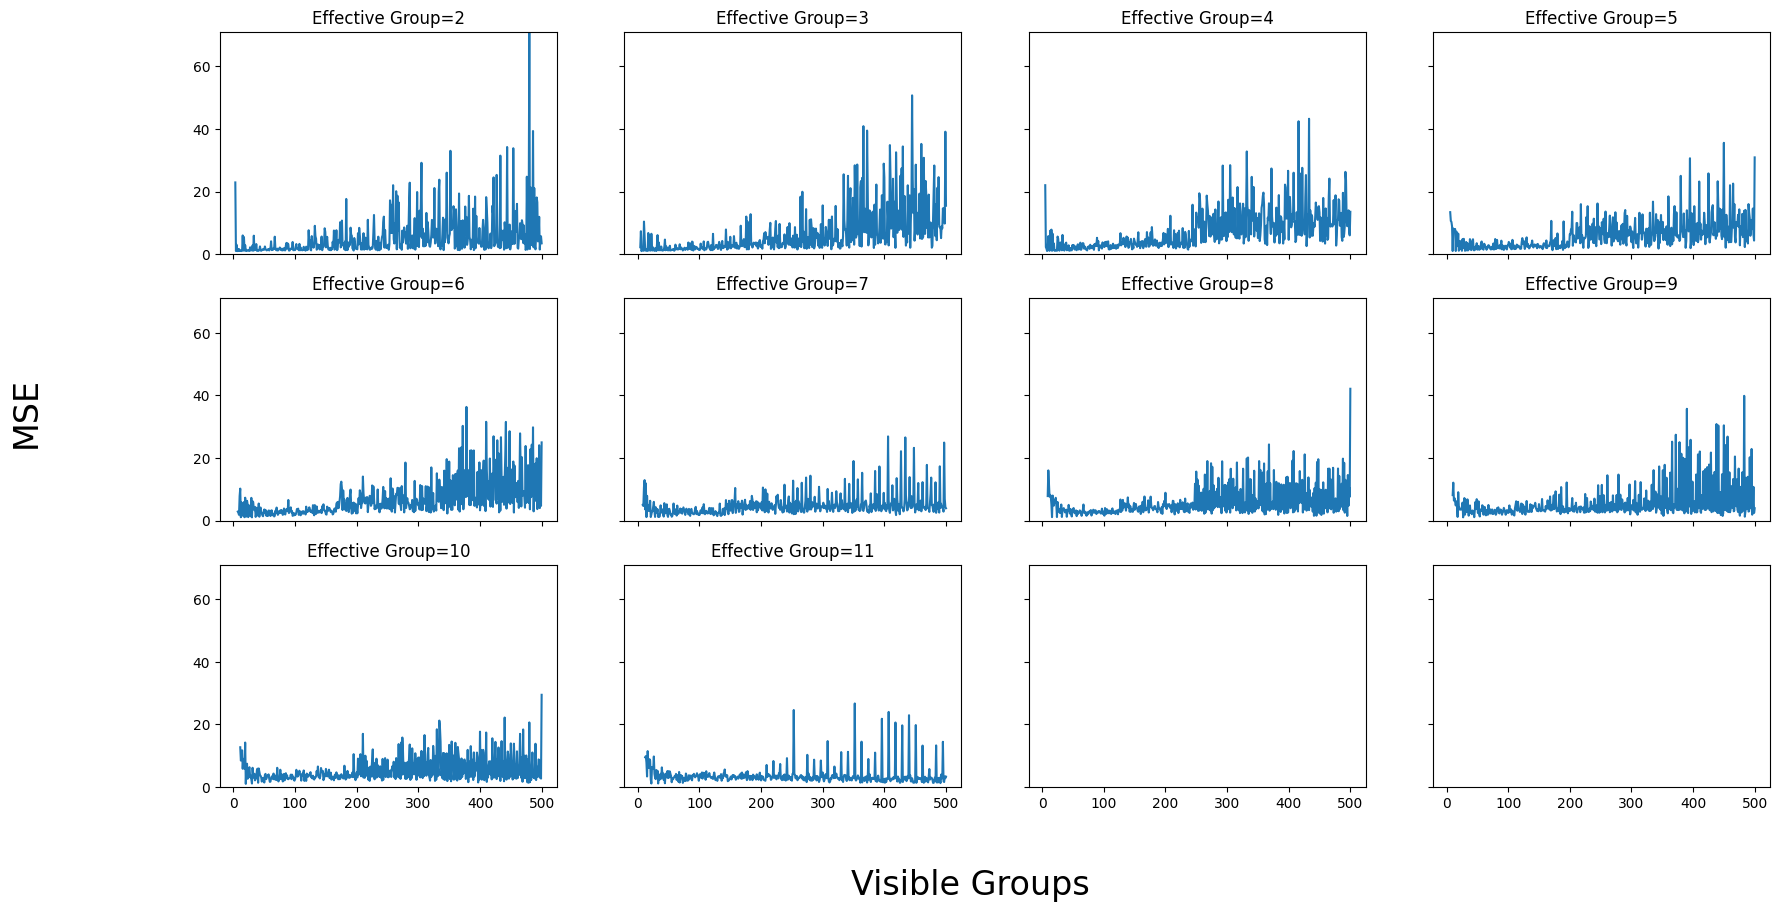

In [328]:
fig, ax = plt.subplots(3,4, figsize=(20, 10), dpi=100, sharey=True, sharex = True)
no = Count(2).gen()

for itr1 in [0,1,2]:
    for itr2 in [0,1,2,3]:
        if itr1 == 2 and itr2>1:
            break
        number = next(no)
        data = results1[results1['gE'] == number]
        ax[itr1,itr2].plot(data.gV, data.mse)
        ax[itr1,itr2].set_title("Effective Group="+str(number))
        ax[itr1,itr2].set_ylim(0, int(max(results1.mse))) 
fig.supxlabel('Visible Groups', fontsize=24)
fig.supylabel('MSE', fontsize=24)
    

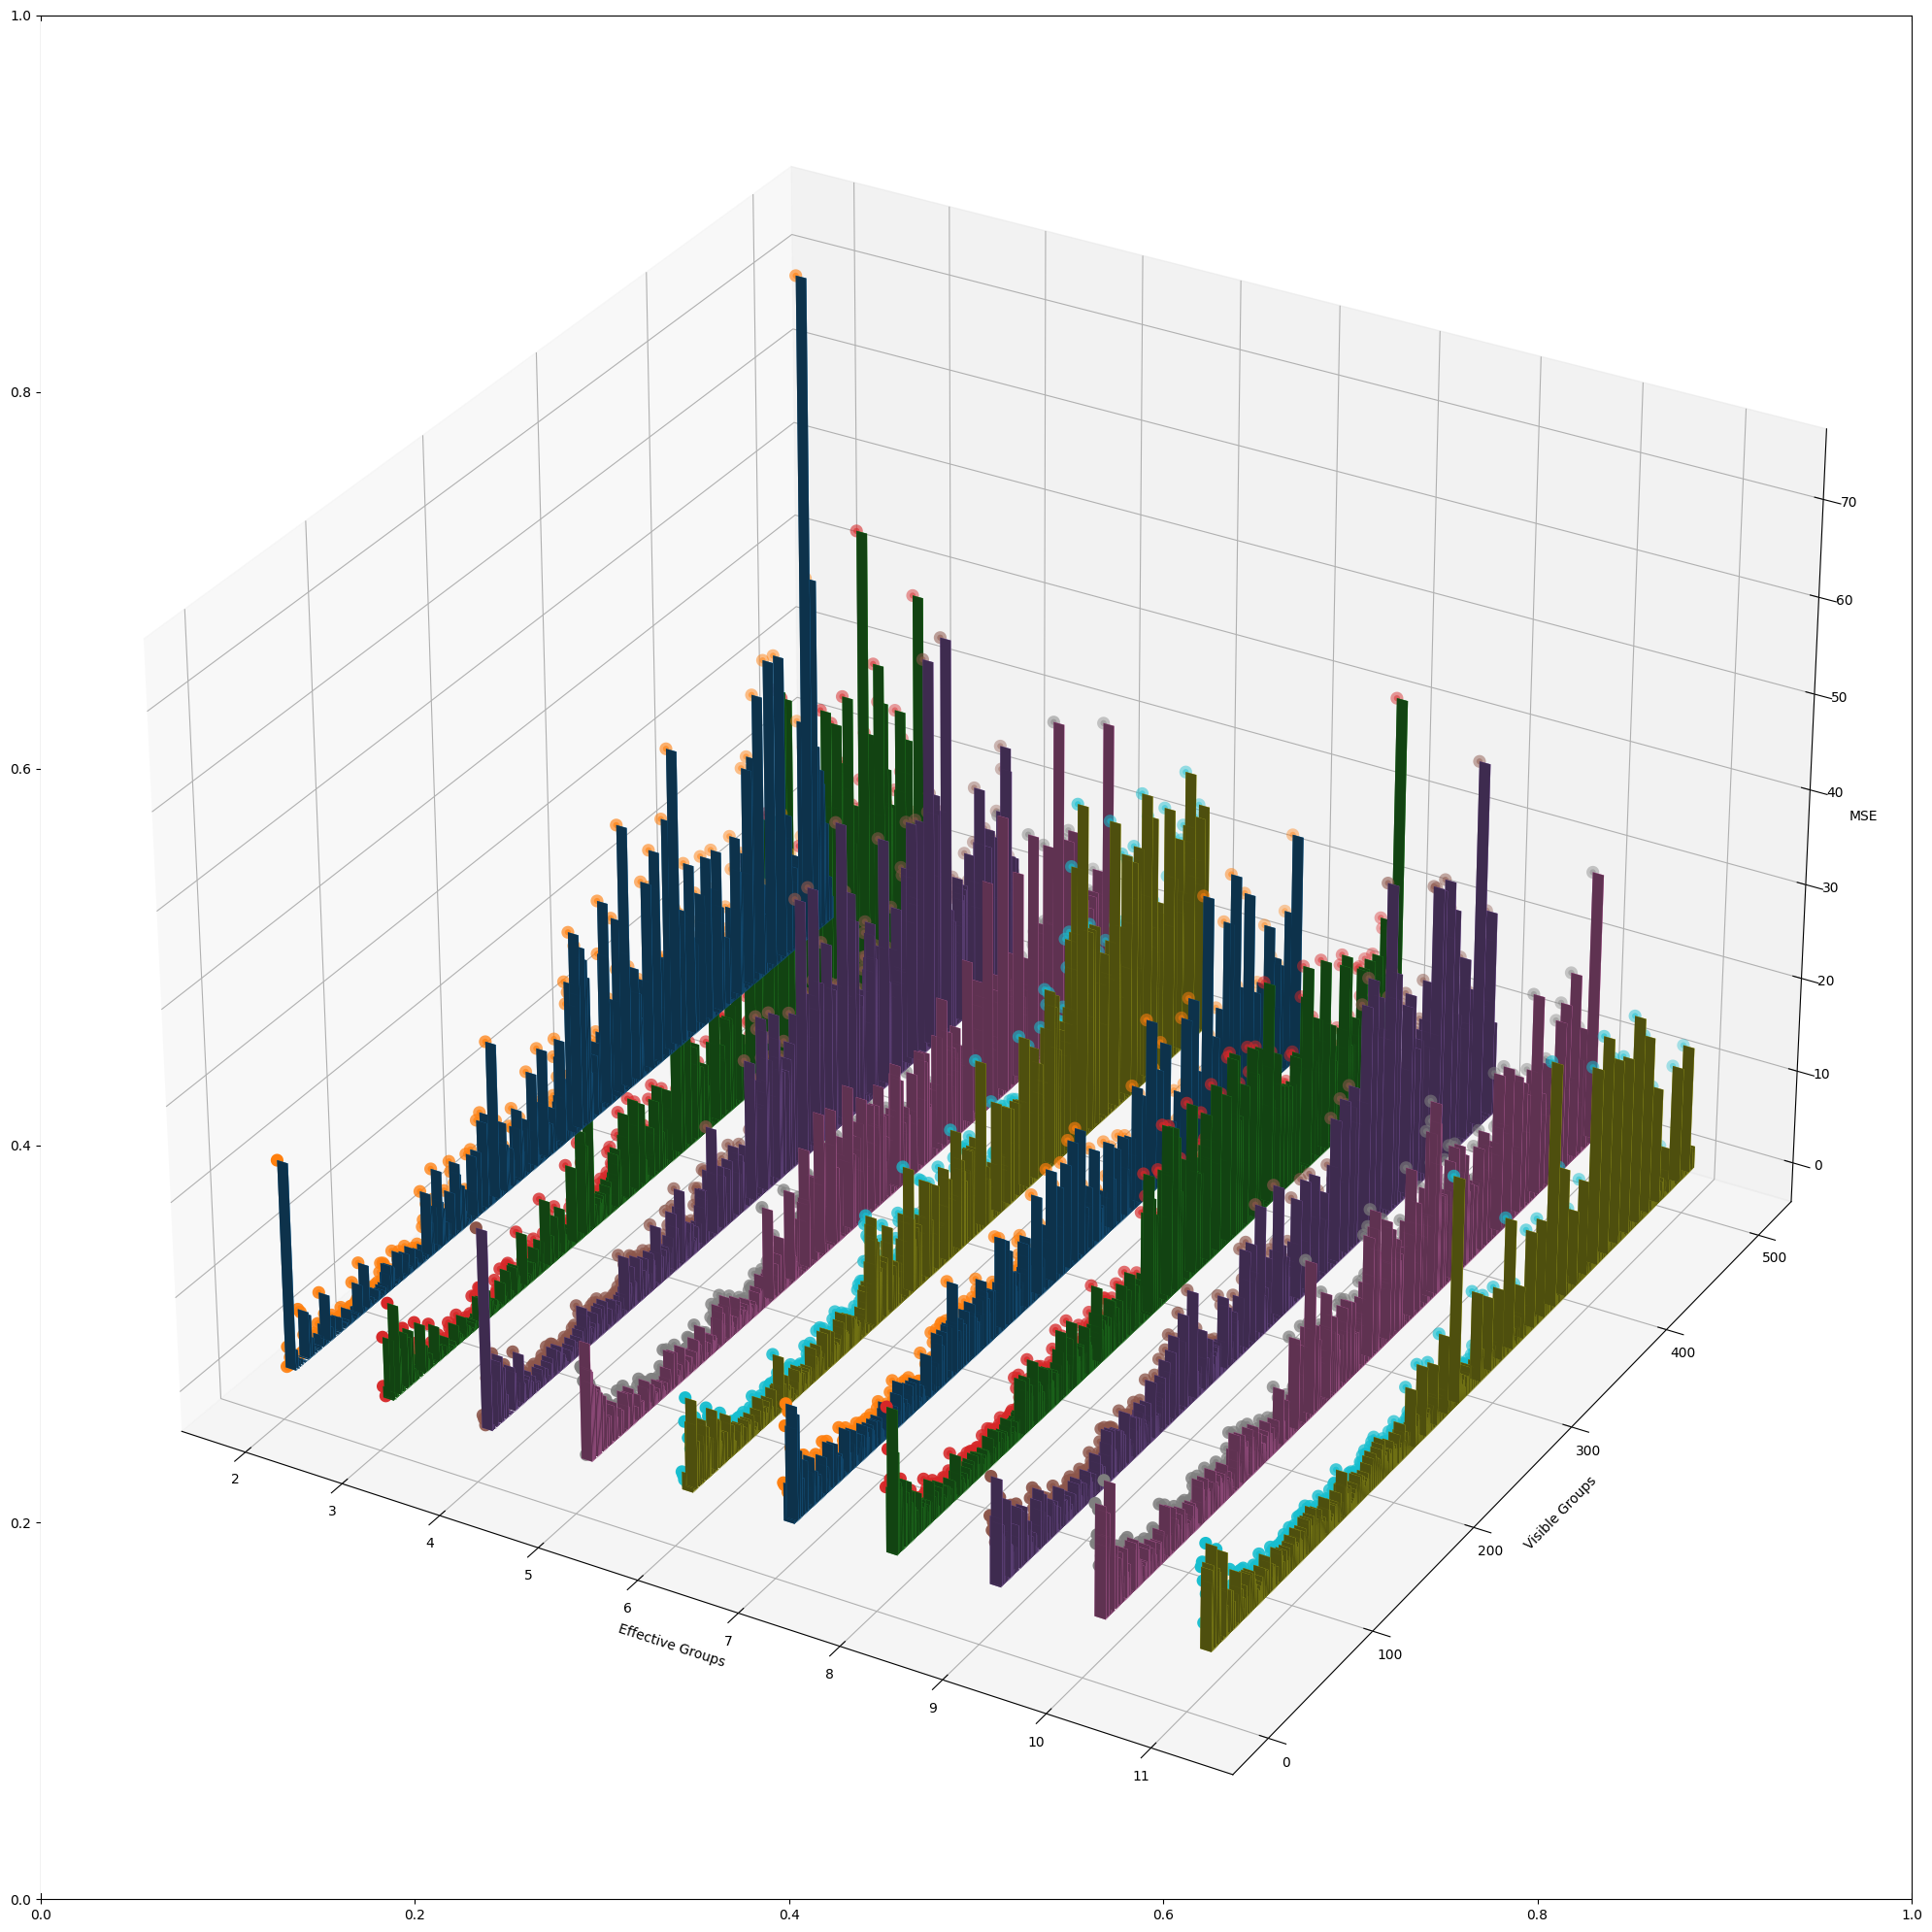

In [326]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig_width = 20  # Width of the figure in inches
fig_height = 20  # Height of the figure in inches
fig_dpi = 100  # Dots per inch (resolution)

# Create a figure and axis
fig = plt.subplots(figsize=(fig_width, fig_height), dpi=fig_dpi)

ax = plt.axes(projection='3d')

for i in np.unique(results1.gE):
    
    data = results1[results1['gE'] == i]
    g1 = data['gE']
    g2 = data['gV']
    error = data['mse']
    
    ax.bar3d(g1, g2, error, dx=0.11, dy=0.11, dz=1-error,cmap='viridis');
#     ax.plot_trisurf(g1, g2, error, cmap='viridis', linewidth=0.02)
#     ax.plot3D(g1, g2, error, linewidth=3)
    ax.scatter3D(g1, g2, error, linewidth = 5)


# Add labels and a colorbar
ax.set_ylabel('Visible Groups')
ax.set_xlabel('Effective Groups')
ax.set_zlabel('MSE')
ax.set_xticks([2,3,4,5,6,7,8,9,10,11])

# Show the plot
plt.tight_layout()
plt.show()


In [208]:
results1[results1.gV < 10]

,gE,gV,mse
0,2.0,3.0,0.930297
1,2.0,4.0,0.969295
2,2.0,5.0,0.983389
3,2.0,6.0,0.929366
4,2.0,7.0,1.049103
5,2.0,8.0,0.970904
6,2.0,9.0,1.047708
18,3.0,4.0,1.037007
19,3.0,5.0,0.952664
20,3.0,6.0,0.931075


In [ ]:
x = results['gE']  # Sample values for g1
y = results['gV']  # Sample values for g2
Z = results['mse']

X, Y = np.meshgrid(x, y)
# Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [305]:
from lmmnn.nn import reg_nn_ohe_or_ignore, reg_nn_lmm, reg_nn_embed, reg_nn_rnn
from lmmnn.simulation import Count
from lmmnn.utils import *
import gc
import time
import tensorflow.keras.backend as K

def run_all(df, use_OHE = False):
    
    if use_OHE == True:
        g_cols = [col for col in df.columns if col if col.startswith('g')]
        df['g_cart'] = df[g_cols].apply(lambda row: '_'.join(row.astype(str)), axis=1)
        df["g_cart"] = pd.factorize(df['g_cart'])[0]
        
        df.rename(columns={'g_cart': 'z0'}, inplace=True)
        df.rename(columns={f'{col}': f'z{i+1}' for i, col in enumerate(g_cols)}, inplace=True)
    else:
        df.rename(columns={'g_cart': 'z0'}, inplace=True)
        df.rename(columns={'gV': 'z0', 'gE': 'z0'}, inplace=True)

    z_cols = sorted([col for col in df.columns if col.startswith('z')], key=lambda x: int(x[1:]))

#     mode = 'slopes'
    mode = 'intercepts'
    n_cats = [len(df[i].unique()) for i in z_cols]
    qs = n_cats
    batch_size = 100
    epochs = 500
    patience = 10
    n_sig2bs = len(n_cats)
    n_sig2bs_spatial = 0
    est_cors = []
    n_neurons = [50,25,12,6]
    activation = 'linear'
    dropout = []
    spatial_embedded_neurons = []
    dist_matrix = None
    q_spatial = None

    print('n_uniques: ', n_cats)

    X, y = df.drop('y', axis=1), df['y']
    x_cols = [col for col in X.columns if col if not col.startswith('z')]#['z0','z1','z2','z3']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    scaler = StandardScaler()
    X_train[x_cols] = scaler.fit_transform(X_train[x_cols])
    X_test[x_cols]  = scaler.transform(X_test[x_cols])

    def reg_nn(X_train, X_test, y_train, y_test, n_cats, batch=batch_size, epochs=epochs, patience=patience, reg_type='lmm', verbose=False):

        start = time.time()
        if reg_type == 'lmm':
            model_fitted, history, y_pred, sigmas, _, _, n_epochs = reg_nn_lmm(X_train, X_test, y_train, y_test, n_cats, q_spatial, x_cols, batch, epochs, patience,
                                                     n_neurons, dropout, activation,
                                                     mode=mode, n_sig2bs=n_sig2bs, n_sig2bs_spatial=n_sig2bs_spatial,
                                                     est_cors=est_cors, dist_matrix=dist_matrix,
                                                     spatial_embed_neurons=spatial_embedded_neurons, verbose=verbose, log_params=False)
        else:
            raise ValueError(reg_type + 'is an unknown reg_type')
        end = time.time()
        gc.collect()
        K.clear_session()
        mse = np.mean((y_pred - y_test)**2)
        return mse, sigmas, n_epochs, end - start, y_pred, model_fitted

    mse_lmm, sigmas, n_epochs_lmm, time_lmm,y_pred, model= reg_nn(X_train, X_test, y_train, y_test, n_cats, reg_type='lmm', verbose=False)

    return mse_lmm, time_lmm, y_test, y_pred, model 